![image2](https://images.immediate.co.uk/production/volatile/sites/3/2021/02/Coelacanth-animal-crossing-91ace5e.jpg?quality=90&webp=true&resize=620,414)

# Animal Crossing Analysis - Catching Fish and Insects

## Introduction

### What is Animal Crossing?

As a gamer, one of my favorite games is Animal Crossing. This game was first launched on 2001 by Nintendo.

For those who do not know the game series or have not played it, the main objective is to play as a character who lives in a village/island where you can do all sorts of things such as fishing, catching bugs, picking up fruits, digging for fossils, swimming, remodeling your house, the village and more.

One important part of the game series is to start saving money (called Bells in the game), as you start renting a place in the village/island and therefore you need to pay back the money to Tom Nook, who is the landlord and owner of a shop. To pay for this debt, or even for future upgrades to your house or for the village, you need to work hard to save the corresponding Bells. To do this, you can do lots of activities such as selling things.

The most recent Animal Crossing game from the series is called New Horizons, which was released for Nintendo Switch on 2020 and has more than 5 million digital copies sold.

### Why Analysing the Animal Crossing database?

To my surprise, when I started searching for public databases in different online sources, I found that one of the most up-voted databases was from Animal Crossing New Horizons (ACNH). Therefore, I thought it was a great topic to start as my first personal project in Data Analysis with R.

## Analysis Summary

### Business Task:

Perform a thorough analysis of fishes and insects that can be caught in Animal Crossing New Horizons to improve the strategic decisions of gamers, residing in the Northern Hemisphere, to speed up the time to save Bells.

### Questions to be answered:

1. What is the count of animals that make up each category (insects vs fish)?
2. What is the lowest, average and highest selling price per category (insects vs fish)?
3. Which are the top 20 animals with the highest selling price that can be sold at Tom Nook’s shop?
4. Which are the 20 animals with the lowest selling price that can be sold at Tom Nook’s shop? 
5. Which are the top three months where you can find more animals to catch? 
6. Which is the location where the most animals can be found? 
7. Is there a relationship between the location of the species and its selling price? 
8. Is there a relationship between the color of the species and its selling price?

### Stakeholders:

Gamers that play or have an interest in playing Animal Crossing New Horizons (located in the Northern Hemisphere).

### Dataset:

Animal Crossing New Horizons: fish and insects table. The dataset was downloaded from Kaggle [source](https://www.kaggle.com/datasets/jessicali9530/animal-crossing-new-horizons-nookplaza-dataset).

## Setting up the Environment

The ACNH database contains 30 tables in csv format. The data was collected by a group of Animal Crossing fans who build it for public use. To analyze the previous questions, we will focus solely on the insects and fish tables.

### Installing the Appropriate Packages

First, we set up the environment by installing and loading the necessary packages that will help us use the corresponding functions to perform the analysis, in this case, we load `tidyverse` and `knitr`.

In [6]:
install.packages('tidyverse')

Installing tidyverse [2.0.0] ...
	OK [linked cache]


In [7]:
library('tidyverse')

In [8]:
library(knitr)

### Loading the Datasets

Then, we load the following tables from the ACNH database:

- fish table
- insects table

In [9]:
fish_df <- read_csv('fish.csv')

Rows: 80 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (37): Name, Where/How, Shadow, Spawn Rates, Rain/Snow Catch Up, NH Jan, ...
dbl  (4): #, Sell, Total Catches to Unlock, Internal ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [10]:
insects_df <- read_csv('insects.csv')

Rows: 80 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (34): Name, Where/How, Weather, Spawn Rates, NH Jan, NH Feb, NH Mar, NH ...
dbl  (4): #, Sell, Total Catches to Unlock, Internal ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Cleaning

After setting up the environment, a data cleaning process was undertaken to confirm that the tables used for the analysis are ready to be used. The following was checked:

- Preview the information contained in both tables (fish and insects).
- Confirm that columns have the correct data type for analysis.
- Check tables do not contain duplicate records.
- Confirm that there are no null values in the observations that might affect the analysis.

### Previewing the Data

The following table provides a preview of the columns of the fish database and the first rows of information to have a better overview of the data to be used for the analysis.

In [11]:
head(fish_df)

#,Name,Sell,Where/How,Shadow,Total Catches to Unlock,Spawn Rates,Rain/Snow Catch Up,NH Jan,NH Feb,⋯,SH Dec,Color 1,Color 2,Size,Lighting Type,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
56,anchovy,200,Sea,Small,0,2–5,No,4 AM – 9 PM,4 AM – 9 PM,⋯,4 AM – 9 PM,Blue,Red,1x1,No lighting,Fish81,FishAntyobi,FtrFishAntyobi,4201,LzuWkSQP55uEpRCP5
36,angelfish,3000,River,Small,20,2–5,No,NA,NA,⋯,4 PM – 9 AM,Yellow,Black,1x1,Fluorescent,Fish30,FishAngelfish,FtrFishAngelfish,2247,XTCFCk2SiuY5YXLZ7
44,arapaima,10000,River,XX-Large,50,1,Yes,NA,NA,⋯,4 PM – 9 AM,Black,Blue,3x2,No lighting,Fish36,FishPiraruku,FtrFishPiraruku,2253,mZy4BES54bqwi97br
41,arowana,10000,River,Large,50,1–2,No,NA,NA,⋯,4 PM – 9 AM,Yellow,Black,2x1,Fluorescent,Fish33,FishArowana,FtrFishArowana,2250,F68AvCaqddBJL7ZSN
58,barred knifejaw,5000,Sea,Medium,20,3–5,No,NA,NA,⋯,All day,White,Black,1x1,Fluorescent,Fish47,FishIshidai,FtrFishIshidai,2265,X3R9SFSAaDzBF4fE3
79,barreleye,15000,Sea,Small,100,1,No,9 PM – 4 AM,9 PM – 4 AM,⋯,9 PM – 4 AM,Black,Black,1x1,Fluorescent,Fish84,FishDemenigisu,FtrFishDemenigisu,4204,BpqTa4zmTjv3Nm4wE


The same exercise was done for the insects table.

In [12]:
head(insects_df)

#,Name,Sell,Where/How,Weather,Total Catches to Unlock,Spawn Rates,NH Jan,NH Feb,NH Mar,⋯,SH Oct,SH Nov,SH Dec,Color 1,Color 2,Icon Filename,Critterpedia Filename,Furniture Filename,Internal ID,Unique Entry ID
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
10,agrias butterfly,3000,Flying near flowers,Any except rain,20,5,NA,NA,NA,⋯,8 AM – 5 PM,8 AM – 5 PM,8 AM – 5 PM,Pink,Green,Ins6,InsectMiirotateha,FtrInsectMiirotateha,620,aj95rMzdbSbvZy9A2
69,ant,80,On rotten turnips,Any weather,0,0,All day,All day,All day,⋯,All day,All day,All day,Black,White,Ins26,InsectAri,FtrInsectAri,588,QZpmczZu4hW2a4Rpv
14,Atlas moth,3000,On trees (any kind),Any weather,20,5,NA,NA,NA,⋯,7 PM – 4 AM,7 PM – 4 AM,7 PM – 4 AM,Orange,Yellow,Ins10,InsectYonagunisan,FtrInsectYonagunisan,652,u2GhYQJXDCQKp7AQ8
68,bagworm,600,Shaking trees (hardwood or cedar only),Any weather,0,50,All day,All day,All day,⋯,All day,All day,All day,Brown,Blue,Ins36,InsectMinomushi,FtrInsectMinomushi,622,QvxgCm82JqHsDknY4
34,banded dragonfly,4500,Flying near water,Any except rain,50,7,NA,NA,NA,⋯,NA,8 AM – 5 PM,8 AM – 5 PM,Black,Yellow,Ins24,InsectOniyanma,FtrInsectOniyanma,635,pCFep58D6QusMSvR7
21,bell cricket,430,On the ground,Any except rain,0,60,NA,NA,NA,⋯,NA,NA,NA,Black,Beige,Ins31,InsectSuzumushi,FtrInsectSuzumushi,642,d5EQqbQsip82G2CZE


### Confirming the Size of the Datasets and Datatypes

After having a quick preview of the datasets, we then need to check how the table is structured and whether the records in each column have the correct data type for analysis. Otherwise, we would need to cast the data to the correct type.

First we see the structure of the fish dataset.

In [13]:
glimpse(fish_df)

Rows: 80
Columns: 41
$ `#`                       <dbl> 56, 36, 44, 41, 58, 79, 37, 1, 22, 54, 67, 2…
$ Name                      <chr> "anchovy", "angelfish", "arapaima", "arowana…
$ Sell                      <dbl> 200, 3000, 10000, 10000, 5000, 15000, 2500, …
$ `Where/How`               <chr> "Sea", "River", "River", "River", "Sea", "Se…
$ Shadow                    <chr> "Small", "Small", "XX-Large", "Large", "Medi…
$ `Total Catches to Unlock` <dbl> 0, 20, 50, 50, 20, 100, 20, 0, 0, 20, 50, 0,…
$ `Spawn Rates`             <chr> "2–5", "2–5", "1", "1–2", "3–5", "1", "1–4",…
$ `Rain/Snow Catch Up`      <chr> "No", "No", "Yes", "No", "No", "No", "No", "…
$ `NH Jan`                  <chr> "4 AM – 9 PM", NA, NA, NA, NA, "9 PM – 4 AM"…
$ `NH Feb`                  <chr> "4 AM – 9 PM", NA, NA, NA, NA, "9 PM – 4 AM"…
$ `NH Mar`                  <chr> "4 AM – 9 PM", NA, NA, NA, "All day", "9 PM …
$ `NH Apr`                  <chr> "4 AM – 9 PM", NA, NA, NA, "All day", "9 PM …
$ `NH May`         

The fish dataset contains 41 columns and 80 observations. From the previous information, we can assume all columns have the correct data types in place for analysis.

Now we do the same for the insects table.

In [14]:
glimpse(insects_df)

Rows: 80
Columns: 38
$ `#`                       <dbl> 10, 69, 14, 68, 34, 21, 49, 26, 77, 31, 47, …
$ Name                      <chr> "agrias butterfly", "ant", "Atlas moth", "ba…
$ Sell                      <dbl> 3000, 80, 3000, 600, 4500, 430, 800, 250, 30…
$ `Where/How`               <chr> "Flying near flowers", "On rotten turnips", …
$ Weather                   <chr> "Any except rain", "Any weather", "Any weath…
$ `Total Catches to Unlock` <dbl> 20, 0, 20, 0, 50, 0, 0, 0, 0, 50, 0, 0, 0, 0…
$ `Spawn Rates`             <chr> "5", "0", "5", "50", "7", "60", "2", "70", "…
$ `NH Jan`                  <chr> NA, "All day", NA, "All day", NA, NA, NA, NA…
$ `NH Feb`                  <chr> NA, "All day", NA, "All day", NA, NA, NA, NA…
$ `NH Mar`                  <chr> NA, "All day", NA, "All day", NA, NA, NA, NA…
$ `NH Apr`                  <chr> "8 AM – 5 PM", "All day", "7 PM – 4 AM", "Al…
$ `NH May`                  <chr> "8 AM – 5 PM", "All day", "7 PM – 4 AM", "Al…
$ `NH Jun`         

The insects table contains 38 columns and 80 observations. As expected, the insects table also has the correct data types in place for analysis.

### Searching for Duplicates

Another important factor is to determine if there are any duplicate records within each table. The following codes confirm that both the fish and the insects tables do not have any duplicate observations.

In [15]:
print(fish_df[duplicated(fish_df), ])

# A tibble: 0 × 41
# ℹ 41 variables: # <dbl>, Name <chr>, Sell <dbl>, Where/How <chr>,
#   Shadow <chr>, Total Catches to Unlock <dbl>, Spawn Rates <chr>,
#   Rain/Snow Catch Up <chr>, NH Jan <chr>, NH Feb <chr>, NH Mar <chr>,
#   NH Apr <chr>, NH May <chr>, NH Jun <chr>, NH Jul <chr>, NH Aug <chr>,
#   NH Sep <chr>, NH Oct <chr>, NH Nov <chr>, NH Dec <chr>, SH Jan <chr>,
#   SH Feb <chr>, SH Mar <chr>, SH Apr <chr>, SH May <chr>, SH Jun <chr>,
#   SH Jul <chr>, SH Aug <chr>, SH Sep <chr>, SH Oct <chr>, SH Nov <chr>, …


In [16]:
print(insects_df[duplicated(insects_df), ])

# A tibble: 0 × 38
# ℹ 38 variables: # <dbl>, Name <chr>, Sell <dbl>, Where/How <chr>,
#   Weather <chr>, Total Catches to Unlock <dbl>, Spawn Rates <chr>,
#   NH Jan <chr>, NH Feb <chr>, NH Mar <chr>, NH Apr <chr>, NH May <chr>,
#   NH Jun <chr>, NH Jul <chr>, NH Aug <chr>, NH Sep <chr>, NH Oct <chr>,
#   NH Nov <chr>, NH Dec <chr>, SH Jan <chr>, SH Feb <chr>, SH Mar <chr>,
#   SH Apr <chr>, SH May <chr>, SH Jun <chr>, SH Jul <chr>, SH Aug <chr>,
#   SH Sep <chr>, SH Oct <chr>, SH Nov <chr>, SH Dec <chr>, Color 1 <chr>, …


### Identifying Null Values

Finally, for each column we assess whether there are any missing values. We will again start with the fish table.

In [17]:
sapply(fish_df, function(x) sum(is.na(x)))

#                    Name                    Sell 
                      0                       0                       0 
              Where/How                  Shadow Total Catches to Unlock 
                      0                       0                       0 
            Spawn Rates      Rain/Snow Catch Up                  NH Jan 
                      0                       0                      49 
                 NH Feb                  NH Mar                  NH Apr 
                     49                      45                      41 
                 NH May                  NH Jun                  NH Jul 
                     36                      25                      22 
                 NH Aug                  NH Sep                  NH Oct 
                     20                      17                      38 
                 NH Nov                  NH Dec                  SH Jan 
                     43                      48                      22 
                 SH Feb                  SH Mar                  SH Apr 
                     20                      17                      38 
                 SH May                  SH Jun                  SH Jul 
                     43                      48                      49 
                 SH Aug                  SH Sep                  SH Oct 
                     49                      45                      41 
                 SH Nov                  SH Dec                 Color 1 
                     36                      25                       0 
                Color 2                    Size           Lighting Type 
                      0                       0                       0 
          Icon Filename   Critterpedia Filename      Furniture Filename 
                      0                       0                       0 
            Internal ID         Unique Entry ID 
                      0                       0

And then for the insects table.

In [18]:
sapply(insects_df, function(x) sum(is.na(x)))

#                    Name                    Sell 
                      0                       0                       0 
              Where/How                 Weather Total Catches to Unlock 
                      0                       0                       0 
            Spawn Rates                  NH Jan                  NH Feb 
                      0                      60                      59 
                 NH Mar                  NH Apr                  NH May 
                     53                      44                      37 
                 NH Jun                  NH Jul                  NH Aug 
                     32                      19                      17 
                 NH Sep                  NH Oct                  NH Nov 
                     29                      46                      53 
                 NH Dec                  SH Jan                  SH Feb 
                     60                      19                      17 
                 SH Mar                  SH Apr                  SH May 
                     29                      46                      53 
                 SH Jun                  SH Jul                  SH Aug 
                     60                      60                      59 
                 SH Sep                  SH Oct                  SH Nov 
                     53                      44                      37 
                 SH Dec                 Color 1                 Color 2 
                     32                       0                       0 
          Icon Filename   Critterpedia Filename      Furniture Filename 
                      0                       0                       0 
            Internal ID         Unique Entry ID 
                      0                       0

For both tables, there are missing values in the columns `NH_Month` and `SH_Month`. NH refers to Northern Hemisphere and SH to Southern Hemisphere.

These null values does not mean that the data is compromised. It symbolizes that an animal, whether it is a fish or an insect, might not be available at certain months of the year.

As no other columns contain null values, we can continue to analyze the data accordingly.

## Processing the Data for Analysis

After making sure the tables to be analyzed are cleaned, we now start to process the data for analysis. To simplify the analysis, we will concatenate both the fish and insects table to create a joined dataframe.

### Adding Useful Columns

First, we will add a column to each table to identify whether the category of the animal is fish or insect. This will allow us to know, after the tables are merged, which type of animal each record corresponds to.

In [19]:
fish_df2 <- mutate(fish_df, Animal_Cat = 'fish')

In [20]:
insects_df2 <- mutate(insects_df, Animal_Cat = 'insect')

Additionally, we can see that the location column has a wide variety of answers. We will try to condense them into fewer locations for better analysis.

In [21]:
insects_df3 <- insects_df2 %>% mutate(Location_Cleaned = case_when(`Where/How` == 'Underground (dig where noise is loudest)' ~ 'Underground', `Where/How` == 'Shaking trees (hardwood or cedar only)' ~ 'Trees', `Where/How` == 'Shaking trees' ~ 'Trees', `Where/How` == 'Sea (rainy days)' ~ 'Sea', `Where/How` == 'Sea' ~ 'Sea', `Where/How` == 'River (mouth)' ~ 'River', `Where/How` == 'River (clifftop)' ~ 'River', `Where/How` == 'Pushing snowballs' ~ 'Other', `Where/How` == 'Pond' ~ 'Pond', `Where/How` == 'Pier' ~ 'Sea', `Where/How` == 'On white flowers' ~ 'Flowers', `Where/How` == 'On villagers' ~ 'Other', `Where/How` == 'On trees (any kind)' ~ 'Trees', `Where/How` == 'On tree stumps' ~ 'Trees', `Where/How` == 'On the ground' ~ 'Ground', `Where/How` == 'On rotten turnips' ~ 'Other', `Where/How` == 'On rocks/bushes' ~ 'Other', `Where/How` == 'On rivers/ponds' ~ 'Pond', `Where/How` == 'On palm trees' ~ 'Trees', `Where/How` == 'On hardwood/cedar trees' ~ 'Trees', `Where/How` == 'On flowers' ~ 'Flowers', `Where/How` == 'On beach rocks' ~ 'Rocks', `Where/How` == 'From hitting rocks' ~ 'Rocks', `Where/How` == 'Flying near water' ~ 'Flying', `Where/How` == 'Flying near light sources' ~ 'Flying', `Where/How` == 'Flying near flowers' ~ 'Flying', `Where/How` == 'Flying near blue/purple/black flowers' ~ 'Flying', `Where/How` == 'Flying' ~ 'Flying', `Where/How` == 'Disguised under trees' ~ 'Trees', `Where/How` == 'Disguised on shoreline' ~ 'Underground', `Where/How` == 'River' ~ 'River', TRUE ~ 'Other'))

fish_df3 <- fish_df2 %>% mutate(Location_Cleaned = case_when(`Where/How` == 'Underground (dig where noise is loudest)' ~ 'Underground', `Where/How` == 'Shaking trees (hardwood or cedar only)' ~ 'Trees', `Where/How` == 'Shaking trees' ~ 'Trees', `Where/How` == 'Sea (rainy days)' ~ 'Sea', `Where/How` == 'Sea' ~ 'Sea', `Where/How` == 'River (mouth)' ~ 'River', `Where/How` == 'River (clifftop)' ~ 'River', `Where/How` == 'Pushing snowballs' ~ 'Other', `Where/How` == 'Pond' ~ 'Pond', `Where/How` == 'Pier' ~ 'Sea', `Where/How` == 'On white flowers' ~ 'Flowers', `Where/How` == 'On villagers' ~ 'Other', `Where/How` == 'On trees (any kind)' ~ 'Trees', `Where/How` == 'On tree stumps' ~ 'Trees', `Where/How` == 'On the ground' ~ 'Ground', `Where/How` == 'On rotten turnips' ~ 'Other', `Where/How` == 'On rocks/bushes' ~ 'Other', `Where/How` == 'On rivers/ponds' ~ 'Pond', `Where/How` == 'On palm trees' ~ 'Trees', `Where/How` == 'On hardwood/cedar trees' ~ 'Trees', `Where/How` == 'On flowers' ~ 'Flowers', `Where/How` == 'On beach rocks' ~ 'Rocks', `Where/How` == 'From hitting rocks' ~ 'Rocks', `Where/How` == 'Flying near water' ~ 'Flying', `Where/How` == 'Flying near light sources' ~ 'Flying', `Where/How` == 'Flying near flowers' ~ 'Flying', `Where/How` == 'Flying near blue/purple/black flowers' ~ 'Flying', `Where/How` == 'Flying' ~ 'Flying', `Where/How` == 'Disguised under trees' ~ 'Trees', `Where/How` == 'Disguised on shoreline' ~ 'Underground', `Where/How` == 'River' ~ 'River', TRUE ~ 'Other'))

### Merging the Tables

Then we merge both tables to have a complete view of the animals that can be caught in the game, and, as we focus only on information on the Northern Hemisphere, we remove all data for the Southern Hemisphere (SH) to aviod data cluttering.

In [22]:
fish_insects_df <- bind_rows(fish_df3, insects_df3) %>% select(-'SH Jan', -'SH Feb', -'SH Mar', -'SH Apr', -'SH May', -'SH Jun', -'SH Jul', -'SH Aug', -'SH Sep', -'SH Oct', -'SH Nov', -'SH Dec')

## Analysing the Data

Now that we have the data processed, we can start analyzing the information and answering relevant questions that will help gamers to take their strategic direction of their needs.

### What is the count of animals that make up each category (insects vs fish)?

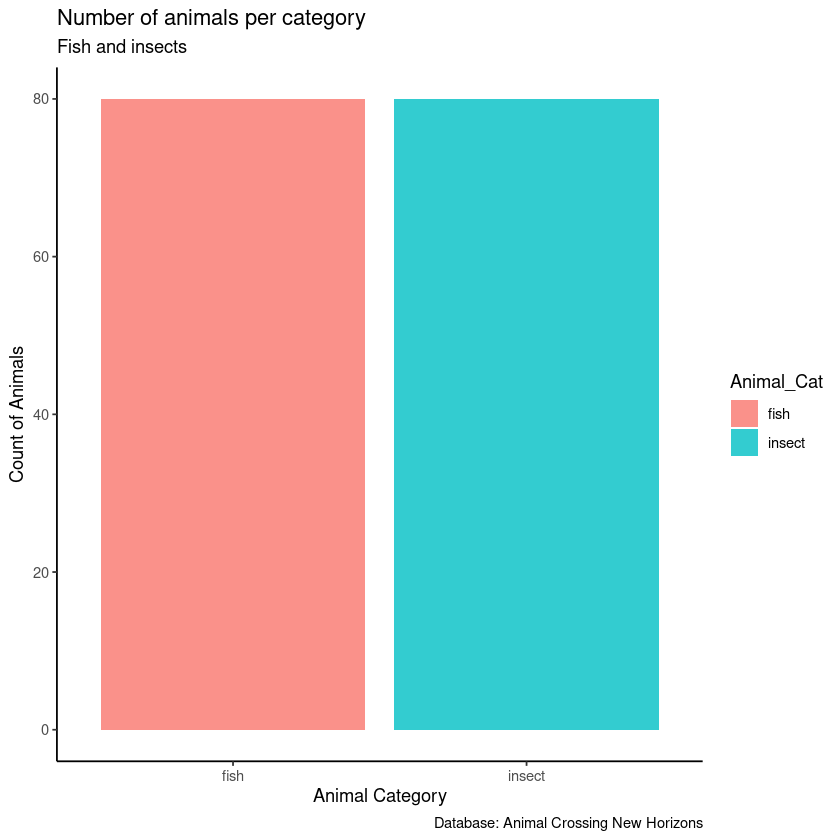

In [43]:
ggplot(data = fish_insects_df) + 
  geom_bar(mapping = aes(x = Animal_Cat, fill = Animal_Cat), alpha = .8) +
  labs(y = 'Count of Animals', x = 'Animal Category', title = 'Number of animals per category', subtitle = 'Fish and insects', caption = 'Database: Animal Crossing New Horizons') + 
  theme_classic() 

Both the fish and insects table each contain 80 distinct animals, accounting for a total of 160 possible animals to catch in the game, and which constitutes a big opportunity to sell at Tom Nook’s Shop to save Bells.

### What is the lowest, average and highest selling price per category (insects vs fish)?

In [27]:
animal_stats <- fish_insects_df %>% group_by(Animal_Cat) %>% summarise(Lowest_Sell = round(min(Sell),0), Avg_Sell = round(mean(Sell),0), Max_Sell = round(max(Sell),2))
animal_stats

Animal_Cat,Lowest_Sell,Avg_Sell,Max_Sell
<chr>,<dbl>,<dbl>,<dbl>
fish,100,3745,15000
insect,10,2220,12000


From the previous table, it can be inferred that the fish category tends to have animals which are paid at a higher price than insects. Thus, it could be important for gamers to focus more time on catching fishes to speeden up the time to save Bells.

### Which are the top 20 animals with the highest selling price that can be sold at Tom Nook’s shop?

In [32]:
animal_price_highest <- fish_insects_df %>% select(Name, Animal_Cat, Sell) %>% arrange(-Sell) 
head(animal_price_highest, n = 20)

Name,Animal_Cat,Sell
<chr>,<chr>,<dbl>
barreleye,fish,15000
coelacanth,fish,15000
dorado,fish,15000
golden trout,fish,15000
great white shark,fish,15000
stringfish,fish,15000
whale shark,fish,13000
saw shark,fish,12000
giraffe stag,insect,12000


From the top 20 animals with the highest sales price, 15 (75%) come from the fish category and the remaining 5 (25%) of the insects category. This is visualized in the following table:

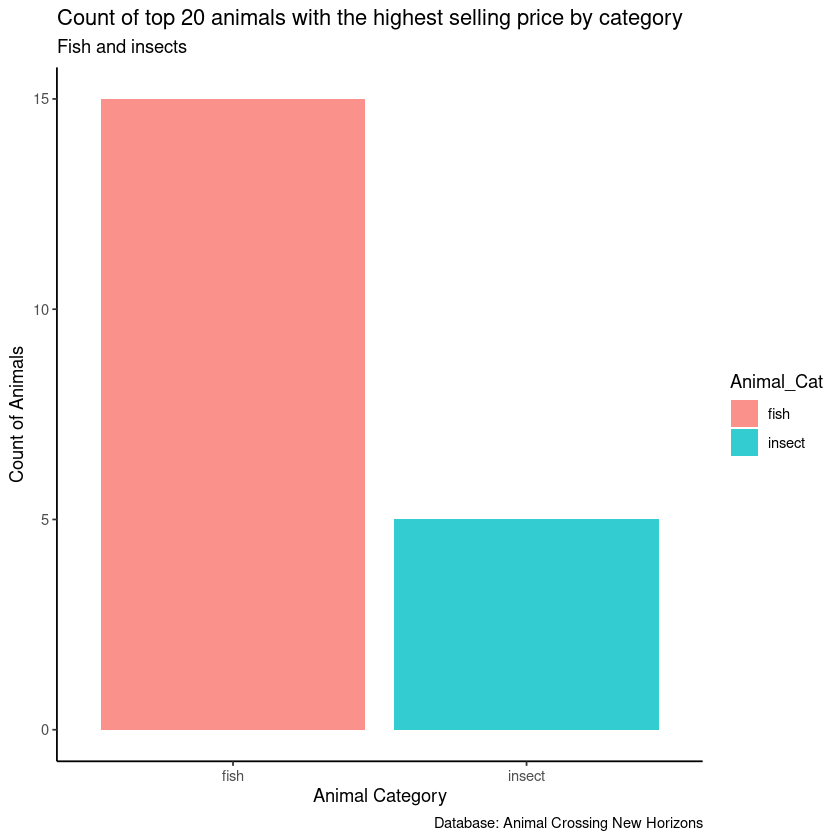

In [30]:
ggplot(data = (head(animal_price_highest, n = 20))) + 
  geom_bar(mapping = aes(x = Animal_Cat, fill = Animal_Cat), alpha = .8) +
  labs(x = 'Animal Category', y = 'Count of Animals', title = 'Count of top 20 animals with the highest selling price by category', subtitle = 'Fish and insects', caption = 'Database: Animal Crossing New Horizons') +
  theme_classic()

### Which are the 20 animals with the lowest selling price that can be sold at Tom Nook’s shop?

Similarly, we can find those animals with the lowest selling price.

In [34]:
animal_price_lowest <- fish_insects_df %>% select(Name, Animal_Cat, Sell) %>% arrange(Sell) 
head(animal_price_lowest, n = 20)

Name,Animal_Cat,Sell
<chr>,<chr>,<dbl>
cicada shell,insect,10
fly,insect,60
flea,insect,70
ant,insect,80
tadpole,fish,100
frog,fish,120
stinkbug,insect,120
cricket,insect,130
mosquito,insect,130


The previous table presents those animals with the lowest selling price paid at Tom Nook’s Shop, where 6 (30%) come from the fish category and 14 (70%) from the insects category. This is visualized in the following table:

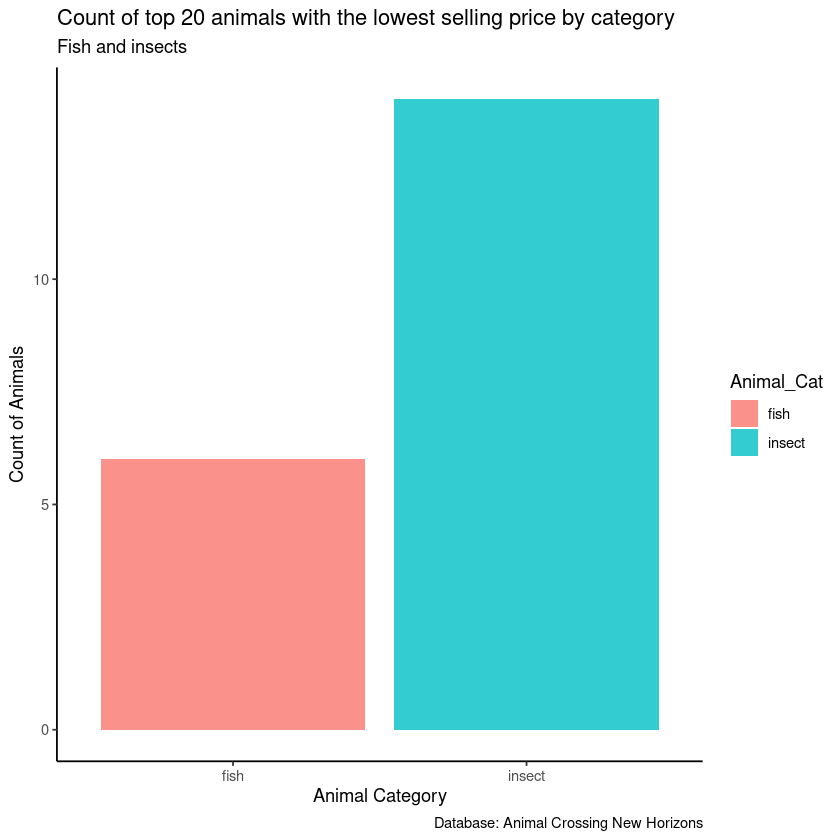

In [35]:
ggplot(data = (head(animal_price_lowest, n = 20))) + 
  geom_bar(mapping = aes(x = Animal_Cat, fill = Animal_Cat), alpha = .8) +
  labs(x = 'Animal Category', y = 'Count of Animals', title = 'Count of top 20 animals with the lowest selling price by category', subtitle = 'Fish and insects', caption = 'Database: Animal Crossing New Horizons') +
  theme_classic()

The previous graphs supports the assumption that fishing will create higher savings of Bells, as fish tend to be paid at a higher price than insects.

### Which are the top three months where you can find more animals to catch?

To spot the first three months where you can find more animals in the Northern Hemisphere, the data was transformed from a wide format to a long format. This can be shown in the following code and table:

In [37]:
species_per_month <- data.frame(month = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), num_of_animals = c((sum(!is.na(fish_insects_df$`NH Jan`))), (sum(!is.na(fish_insects_df$`NH Feb`))), (sum(!is.na(fish_insects_df$`NH Mar`))), (sum(!is.na(fish_insects_df$`NH Apr`))), (sum(!is.na(fish_insects_df$`NH May`))), (sum(!is.na(fish_insects_df$`NH Jun`))), (sum(!is.na(fish_insects_df$`NH Jul`))), (sum(!is.na(fish_insects_df$`NH Aug`))), (Total_Jan <- sum(!is.na(fish_insects_df$`NH Sep`))), (sum(!is.na(fish_insects_df$`NH Oct`))), (sum(!is.na(fish_insects_df$`NH Nov`))), (sum(!is.na(fish_insects_df$`NH Dec`)))))
species_per_month

month,num_of_animals
<chr>,<int>
Jan,51
Feb,52
Mar,62
Apr,75
May,87
Jun,103
Jul,119
Aug,123
Sep,114


After transforming the data, we can now plot the information:

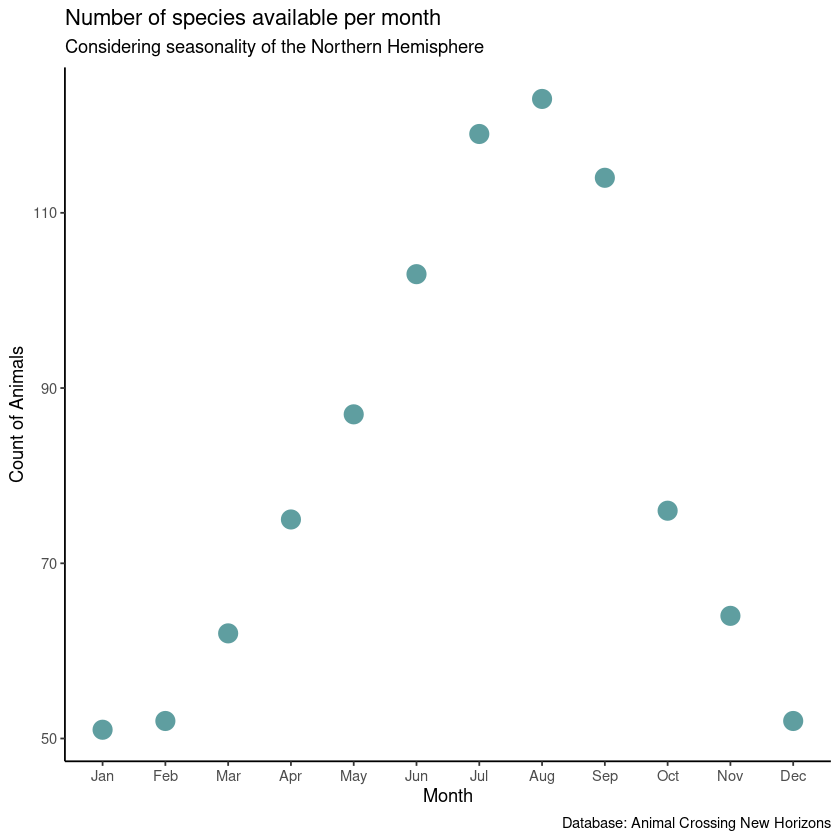

In [38]:
ggplot(data = species_per_month) + 
  geom_point(mapping = aes(x = month, y = num_of_animals), color = '#5F9EA0', size = 5) +
  labs(x = 'Month', y = 'Count of Animals', title = 'Number of species available per month', subtitle = 'Considering seasonality of the Northern Hemisphere', caption = 'Database: Animal Crossing New Horizons') +
  scale_x_discrete(limits = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')) +
  theme_classic()

It can be seen that the peek months where you can find more animals are July, August and September, whereas the months with the least species available are December, January and February. This can be explained due to seasonality in the Northern Hemisphere, where Summer-Autumn has more variety of animals, and during Winter it decreases.

### Which is the location where the most animals can be found?

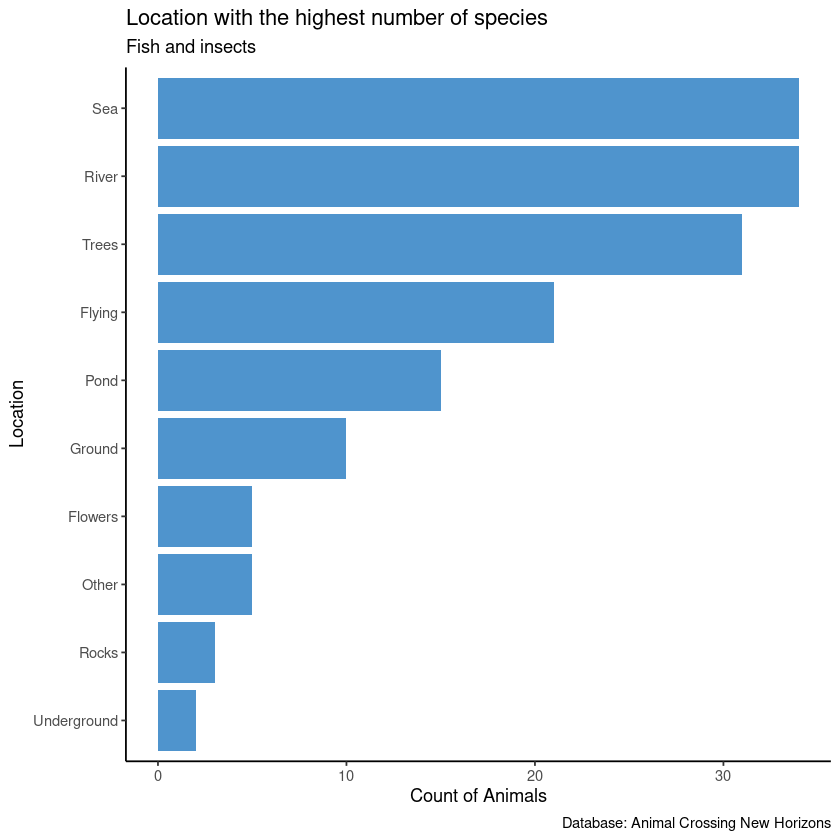

In [39]:
ggplot(data = fish_insects_df) +
  geom_bar(mapping = aes(x = Location_Cleaned), fill = '#4F94CD') +
  labs(x = 'Location', y = 'Count of Animals', title = 'Location with the highest number of species', subtitle = 'Fish and insects', caption = 'Database: Animal Crossing New Horizons') +
  coord_flip() +
  scale_x_discrete(limits = c('Underground', 'Rocks', 'Other', 'Flowers', 'Ground', 'Pond', 'Flying', 'Trees', 'River', 'Sea')) +
  theme_classic()

From the previous graph, it can be concluded that Sea, Rivers and Trees are the locations with the highest number of species where gamers can focus on to catch fish or bugs.

### Is there a relationship between the location of the species and its selling price?

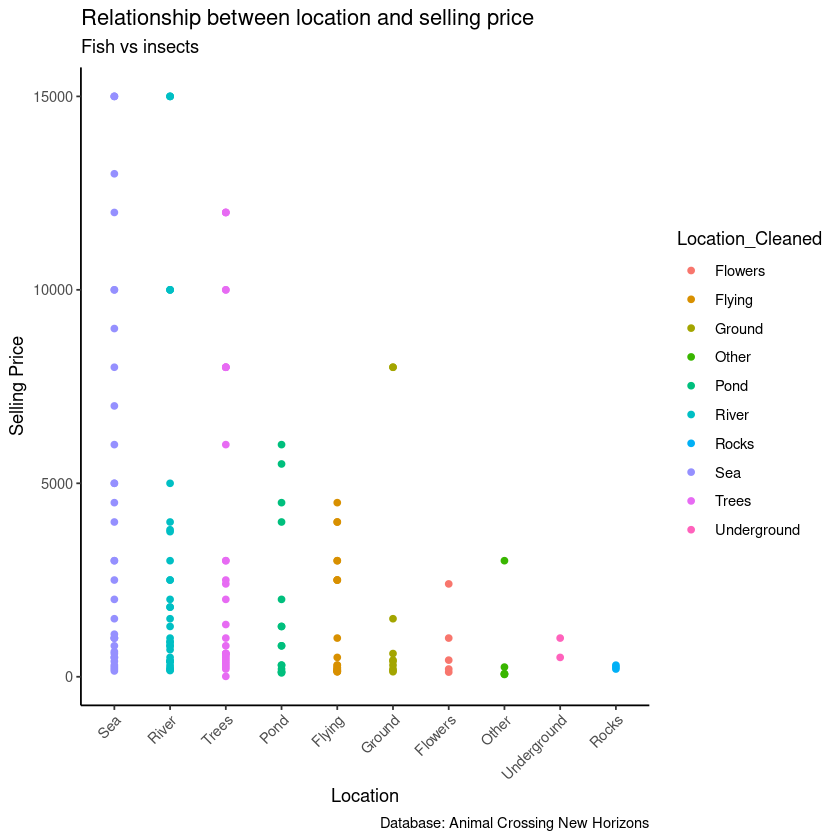

In [40]:
ggplot(data = fish_insects_df) +
  geom_point(mapping = aes(x = Location_Cleaned, y = Sell, color = Location_Cleaned)) +
  labs(x = 'Location', y = 'Selling Price', title = 'Relationship between location and selling price', subtitle = 'Fish vs insects', caption = 'Database: Animal Crossing New Horizons') +
  theme_classic() +
  scale_x_discrete(limits = c('Sea', 'River', 'Trees', 'Pond', 'Flying', 'Ground', 'Flowers', 'Other', 'Underground', 'Rocks')) +
  theme(axis.text.x = element_text(angle = 45, hjust=1))

From the previous table we can see that animals captured at the Sea, Rivers and Trees have a greater range on their selling price. This means that, within these three places, the gamer can have more chances to find species that are paid much higher than those found at other locations such as Flowers, Underground and Rocks. However, there is no clear relationship between location and selling price, due to this wide ranges in price.

### Is there a relationship between the color of the species and its selling price?

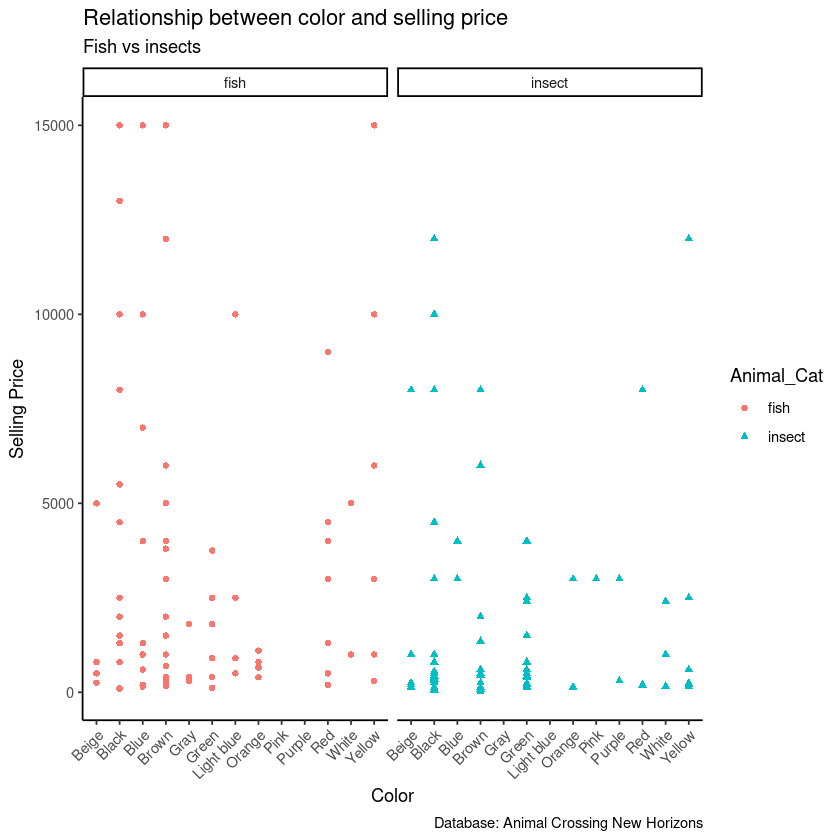

In [41]:
ggplot(data = fish_insects_df) +
  geom_point(mapping = aes(x = `Color 1`, y = Sell, shape = Animal_Cat, color = Animal_Cat)) +
  labs(x = 'Color', y = 'Selling Price', title = 'Relationship between color and selling price', subtitle = 'Fish vs insects', caption = 'Database: Animal Crossing New Horizons') +
  facet_wrap(~ Animal_Cat) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust=1))

As previously visualized on the graph, there is not a clear relationship between color and selling price of species for neither the fish or insects category. However, we can see that there are only a few Pink, Purple and Gray animals from the total species in the village/island.

## Recommendations

After a thorough analysis of the information, there are a few recommendations that gamers in the Northern Hemisphere could adopt to increase their changes to save Bells quicker:

1. Focus more time and effort on catching and selling fishes, as this category tends to have a higher average selling price than insects.
2. During the months of July, August and September increase efforts in catching species; as these months tend to have more animals to catch and later sell.
3. Spend more time on catching animals at the Sea, Rivers and Trees. These locations provide animals that have a higher chance of having a higher selling price than other locations.

![image](https://assets.nintendo.com/image/upload/ar_16:9,c_lpad,w_656/b_white/f_auto/q_auto/ncom/software/switch/70010000027619/9989957eae3a6b545194c42fec2071675c34aadacd65e6b33fdfe7b3b6a86c3a)